# Behavioral Finance 2020
## Tutorial 1 — R Essentials

*Martin Stancsics* (martin.stancsics@econ.uzh.ch)

# Basics

R is an

 - interpreted
 - dyamically typed
 - multi-paradigm

programming language.

Altough it can be considered to be multi-paradigm (like Python) as it supports a variety of coding styles, it is *at heart a functional* language.

If you did not understand much of the above, it is perfectly alright – you can still easily use R for data manipulation, data visualization, running regressions, and a whole lot more. However, if you have more programming experience, these attributes might help you find R's place in the taxonomy of programming languages.

## Vectors

In R, there is no difference between a scalar and a (one-element) vector.

In [1]:
vec0 <- 0
vec1 <- c(1, 2, 3)
vec2 <- c(4, 5, 6)

Many functions and operators in R are vectorized

In [2]:
vec1 + vec2

[1] 5 7 9

In [3]:
sqrt(vec1)

[1] 1.000000 1.414214 1.732051

In [4]:
ifelse(vec1 <= 2, vec1, vec2)

[1] 1 2 6

One of the most important operation on vectors is concatenation

In [5]:
c(vec0, vec1, vec2)

[1] 0 1 2 3 4 5 6

Vectors have *types*

In [6]:
typeof(c(TRUE, FALSE))
typeof(c(1L, 2L, 3L))
typeof(c(1.0, 2.5, pi))
typeof(c("a", "b", "c"))

[1] "logical"

[1] "integer"

[1] "double"

[1] "character"

Each element of a vector must be of the same type, but implicit casting occurs in some cases

In [7]:
vec_char <- c("a", "b", "c")
c(vec1, vec_char)

[1] "1" "2" "3" "a" "b" "c"

Not in others, though

In [8]:
vec1 + vec_char

ERROR: Error in vec1 + vec_char: non-numeric argument to binary operator


## Lists

Lists are more flexible.
 - can have heterogeneous elements
 - can be recursive (can have lists as elements)
 - can have vectors as elements

In [10]:
lst1 <- list(1, 2, 3)
lst1

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

In [11]:
lst2 <- list(
    c(1, 2, 3),
    c(4, 5, 6)
)
lst2

[[1]]
[1] 1 2 3

[[2]]
[1] 4 5 6

In [12]:
c(lst1, lst2)

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

[[4]]
[1] 1 2 3

[[5]]
[1] 4 5 6

In [13]:
lst1[[4]] <- lst2
lst1

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

[[4]]
[[4]][[1]]
[1] 1 2 3

[[4]][[2]]
[1] 4 5 6

`[]` always returns a sublist, while `[[]]` always return an element

In [14]:
lst1[1]

[[1]]
[1] 1

In [15]:
lst1[[1]]

[1] 1

In [16]:
lst1[1:2]

[[1]]
[1] 1

[[2]]
[1] 2

In [17]:
lst1[[1:2]]

ERROR: Error in lst1[[1:2]]: subscript out of bounds


## Functions

Defining functions in R is really simple. Do so often!

In [18]:
fun1 <- function(a, b) {
    return(a + b)
}
fun1(2, 3)

[1] 5

If there is no return statement (function), the result of the last expression is returned implicitly

In [19]:
fun2 <- function(a, b) {
    a - b
}
fun2(2, 3)

[1] -1

Function arguments can also be specified by name instead of position

In [20]:
fun2(b = 2, a = 3)

[1] 1

And functions can do a whole lot of things in R:
 - take functions as arguments
 - return functions
 - delay the evaluation of their arguments
 - and much more...

However, their most important use cases are *eliminating code repetition* and *code structuring*. When you find yourself repeating or copy pasting the same section of code (with possibly minor differences), it is a sign of bad code (code smell), and you are most often better of refactoring the repeated code section into a function and calling it multiple times.

## Control flow

R has the usual set of control flow tools

In [21]:
a <- 3
if (a < 2) {
    print("a is small")
} else if (a < 4) {
    print("a is pretty large")
} else {
    print("Whoah, a is humongous")
}

[1] "a is pretty large"


In [22]:
for (i in 1:3) {
    print(i)
}

[1] 1
[1] 2
[1] 3


In [23]:
n <- 1
while (n < 3) {
    print(n)
    n <- n + 1
}

[1] 1
[1] 2


They can of course be nested

In [24]:
for (i in 1:10) {
    if (i %% 6 == 0) {
        print("fizzbuzz")
    } else if (i %% 2 == 0) {
        print("fizz")
    } else if (i %% 3 == 0) {
        print("buzz")
    } else {
        print(i)
    }
}

[1] 1
[1] "fizz"
[1] "buzz"
[1] "fizz"
[1] 5
[1] "fizzbuzz"
[1] 7
[1] "fizz"
[1] "buzz"
[1] "fizz"


## Distributions

It is often useful to generate random vectors in R

In [25]:
runif(10)
rnorm(10, mean = 1, sd = 2)
rbernoulli(10)

[1] 0.696078337 0.348335445 0.843996014 0.666979966 0.131386858 0.460819977
 [7] 0.143666070 0.315809131 0.410628845 0.007287469

[1] -3.0329106  1.7500319  1.9194718  1.1214047  0.6085829  1.9616081
 [7] -0.3052133 -0.9994176 -0.9462247 -1.5403926

ERROR: Error in rbernoulli(10): could not find function "rbernoulli"


And there are a whole lot of other `r______` functions as you would expect

Similarly, probability density functions (PDFs), cumulative density functions (CDFs), and inverse CDFs / quantile functions can be easily calculated in R with the `d______`, `p______`, `q______` functions respectively

In [26]:
dnorm(0)
pnorm(-1.96)
qnorm(0.975)

[1] 0.3989423

[1] 0.0249979

[1] 1.959964

Finally, these functions are also vectorized in a very flexible way

In [27]:
qnorm(c(0.9, 0.95, 0.975, 0.99))
punif(1, min = 0, max = c(1, 2, 3, 4, 5))

[1] 1.281552 1.644854 1.959964 2.326348

[1] 1.0000000 0.5000000 0.3333333 0.2500000 0.2000000

# Working with data

There are multiple packages for working with data:

 - Base R:
   - (+) Available by default
   - (-) Sometimes questionable and idiosyncratic behavior behavior
   - (-) Not very intuitive/readable
   - (/) Suitable for small-medium data (<1-2 GiB)


 - data.table:
   - (+) Very concise syntax
   - (+) Suitable for small-large(ish) data (tens of GiB depending on available memory)
   - (+) Lightning fast filtering and joins
   - (-) Too concise syntax (not very readable)
   - (-) Not so easy to learn


 - Tidyverse:
   - (+) Very readable syntax
   - (+) Relatively easy to learn
   - (-) Verbose syntax
   - (/) Suitable for small-medium data (<1-2 GiB)

In this tutorial I will focus on the Tidyverse solutions. The others are in the tutorial notes mainly as a reference.

For R beginners, I would suggest using doing things the Tidyverse way. It is more than adaquate for this course, and is easier to learn and much more readable than the others. However, if for any reason, you would prefer to use the other approaches in the problem sets, feel free to do so.

## Reading data

### Base R

In [28]:
cars_df <- read.csv("cars.csv")

In [29]:
head(cars_df)

Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
12.0,8,307,130,18,chevrolet chevelle malibu,USA,3504,1970-01-01
11.5,8,350,165,15,buick skylark 320,USA,3693,1970-01-01
11.0,8,318,150,18,plymouth satellite,USA,3436,1970-01-01
12.0,8,304,150,16,amc rebel sst,USA,3433,1970-01-01
10.5,8,302,140,17,ford torino,USA,3449,1970-01-01
10.0,8,429,198,15,ford galaxie 500,USA,4341,1970-01-01


In [30]:
sapply(cars_df, class)

Acceleration        Cylinders     Displacement       Horsepower 
       "numeric"        "integer"        "numeric"        "numeric" 
Miles_per_Gallon             Name           Origin    Weight_in_lbs 
       "numeric"         "factor"         "factor"        "integer" 
            Year 
        "factor"

### data.table

You have to run `install.packages("data.table")` if you are doing this for the first time

In [31]:
library(data.table)

In [32]:
cars_dt <- fread("cars.csv")

In [33]:
head(cars_dt)

Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
12.0,8,307,130,18,chevrolet chevelle malibu,USA,3504,1970-01-01
11.5,8,350,165,15,buick skylark 320,USA,3693,1970-01-01
11.0,8,318,150,18,plymouth satellite,USA,3436,1970-01-01
12.0,8,304,150,16,amc rebel sst,USA,3433,1970-01-01
10.5,8,302,140,17,ford torino,USA,3449,1970-01-01
10.0,8,429,198,15,ford galaxie 500,USA,4341,1970-01-01


In [34]:
sapply(cars_dt, class)

Acceleration        Cylinders     Displacement       Horsepower 
       "numeric"        "integer"        "numeric"        "numeric" 
Miles_per_Gallon             Name           Origin    Weight_in_lbs 
       "numeric"      "character"      "character"        "integer" 
            Year 
     "character"

### Tidyverse

You have to run `install.packages("tidyverse")` if you are doing this for the first time

In [35]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.3.1  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()


In [36]:
cars_tbl <- read_csv("cars.csv")

Parsed with column specification:
cols(
  Acceleration = col_double(),
  Cylinders = col_double(),
  Displacement = col_double(),
  Horsepower = col_double(),
  Miles_per_Gallon = col_double(),
  Name = col_character(),
  Origin = col_character(),
  Weight_in_lbs = col_double(),
  Year = col_date(format = "")
)


In [37]:
head(cars_tbl)

Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
12.0,8,307,130,18,chevrolet chevelle malibu,USA,3504,1970-01-01
11.5,8,350,165,15,buick skylark 320,USA,3693,1970-01-01
11.0,8,318,150,18,plymouth satellite,USA,3436,1970-01-01
12.0,8,304,150,16,amc rebel sst,USA,3433,1970-01-01
10.5,8,302,140,17,ford torino,USA,3449,1970-01-01
10.0,8,429,198,15,ford galaxie 500,USA,4341,1970-01-01


In [38]:
sapply(cars_tbl, class)

Acceleration        Cylinders     Displacement       Horsepower 
       "numeric"        "numeric"        "numeric"        "numeric" 
Miles_per_Gallon             Name           Origin    Weight_in_lbs 
       "numeric"      "character"      "character"        "numeric" 
            Year 
          "Date"

## Manipulating data

### Slicing and filtering

Single column as a vector:

In [39]:
cars_df[, "Miles_per_Gallon"]                           [1:10]

[1] 18 15 18 16 17 15 14 14 14 15

In [40]:
cars_dt[, Miles_per_Gallon]                           [1:10]

[1] 18 15 18 16 17 15 14 14 14 15

In [41]:
pull(cars_tbl, Miles_per_Gallon)                           [1:10]

[1] 18 15 18 16 17 15 14 14 14 15

Single column as a data.frame / data.table / tibble

In [42]:
cars_df[, "Miles_per_Gallon", drop = FALSE]                       %>% head(3)

Miles_per_Gallon
18
15
18


In [43]:
cars_dt[, .(Miles_per_Gallon)]                       %>% head(3)

Miles_per_Gallon
18
15
18


In [44]:
select(cars_tbl, Miles_per_Gallon)                       %>% head(3)

Miles_per_Gallon
18
15
18


Rows:

In [45]:
cars_df[3:6, ]  # The empty second argument is very important

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
3,11.0,8,318,150,18,plymouth satellite,USA,3436,1970-01-01
4,12.0,8,304,150,16,amc rebel sst,USA,3433,1970-01-01
5,10.5,8,302,140,17,ford torino,USA,3449,1970-01-01
6,10.0,8,429,198,15,ford galaxie 500,USA,4341,1970-01-01


In [46]:
cars_dt[3:6]  # No need for a second argument

Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
11.0,8,318,150,18,plymouth satellite,USA,3436,1970-01-01
12.0,8,304,150,16,amc rebel sst,USA,3433,1970-01-01
10.5,8,302,140,17,ford torino,USA,3449,1970-01-01
10.0,8,429,198,15,ford galaxie 500,USA,4341,1970-01-01


In [47]:
slice(cars_tbl, 3:6)  # The base R solution also works on tibbles

Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
11.0,8,318,150,18,plymouth satellite,USA,3436,1970-01-01
12.0,8,304,150,16,amc rebel sst,USA,3433,1970-01-01
10.5,8,302,140,17,ford torino,USA,3449,1970-01-01
10.0,8,429,198,15,ford galaxie 500,USA,4341,1970-01-01


Columns by position:

In [48]:
cars_df[, 1:2]                          %>% head()

Acceleration,Cylinders
12.0,8
11.5,8
11.0,8
12.0,8
10.5,8
10.0,8


In [49]:
cars_dt[, 1:2]                          %>% head()

Acceleration,Cylinders
12.0,8
11.5,8
11.0,8
12.0,8
10.5,8
10.0,8


In [50]:
select(cars_tbl, 1:2)                          %>% head()

Acceleration,Cylinders
12.0,8
11.5,8
11.0,8
12.0,8
10.5,8
10.0,8


Rows and columns:

In [51]:
cars_df[3:6, 1:2]

,Acceleration,Cylinders
3,11.0,8
4,12.0,8
5,10.5,8
6,10.0,8


In [52]:
cars_dt[3:6, 1:2]

Acceleration,Cylinders
11.0,8
12.0,8
10.5,8
10.0,8


In [53]:
cars_tbl %>% 
    slice(3:6) %>% 
    select(1:2)

Acceleration,Cylinders
11.0,8
12.0,8
10.5,8
10.0,8


More complex indexing:

In [54]:
cars_df[c(1, 3:4, 9), c(1:2, 8)]

,Acceleration,Cylinders,Weight_in_lbs
1,12,8,3504
3,11,8,3436
4,12,8,3433
9,10,8,4425


In [55]:
cars_dt[c(1, 3:4, 9), c(1:2, 8)]

Acceleration,Cylinders,Weight_in_lbs
12,8,3504
11,8,3436
12,8,3433
10,8,4425


In [56]:
cars_tbl %>%
    slice(c(1, 3:4, 9)) %>% 
    select(c(1:2, 8))

Acceleration,Cylinders,Weight_in_lbs
12,8,3504
11,8,3436
12,8,3433
10,8,4425


#### Intermezzo: the pipe operator

The pipe (`%>%`) is a more readable way of composing functions. All it does is that it substitutes its left hand sides to the first argument of the function on its right, and shifts the other arguments by 1. It's easier to see through examples:

In [57]:
2 %>% sqrt()  # equivalent to sqrt(2)

[1] 1.414214

In [58]:
2 %>%
  sqrt() %>%
  log()  # equivalent to log(sqrt(2))

[1] 0.3465736

In [59]:
100 %>% log(10)  # equivalent to log(100, 10)

[1] 2

In [60]:
100 %>% log(10, .)  # equivalent to log(10, 100)

[1] 0.5

As you might have guessed, Tidyverse functions are designed to be nicely composable using the pipe.

Based on column name:

In [61]:
cars_df[c(1, 3:4, 9), c("Horsepower", "Name")]

,Horsepower,Name
1,130,chevrolet chevelle malibu
3,150,plymouth satellite
4,150,amc rebel sst
9,225,pontiac catalina


In [62]:
cars_dt[c(1, 3:4, 9), .(Horsepower, Name)]

Horsepower,Name
130,chevrolet chevelle malibu
150,plymouth satellite
150,amc rebel sst
225,pontiac catalina


In [63]:
cars_tbl %>%
    slice(c(1, 3:4, 9)) %>% 
    select(Horsepower, Name)

Horsepower,Name
130,chevrolet chevelle malibu
150,plymouth satellite
150,amc rebel sst
225,pontiac catalina


Based on conditions:

In [64]:
cars_df[cars_tbl$Origin == "USA" & cars_tbl$Horsepower < 62, ]  # You have to be careful with NAs here!

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA
203,22.2,4,85,52,29.0,chevrolet chevette,USA,2035,1976-01-01
204,22.1,4,98,60,24.5,chevrolet woody,USA,2164,1976-01-01
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [65]:
cars_dt[Origin == "USA" & Horsepower < 62]

Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
22.2,4,85,52,29.0,chevrolet chevette,USA,2035,1976-01-01
22.1,4,98,60,24.5,chevrolet woody,USA,2164,1976-01-01


In [66]:
filter(cars_tbl, Origin == "USA" & Horsepower < 62)

Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
22.2,4,85,52,29.0,chevrolet chevette,USA,2035,1976-01-01
22.1,4,98,60,24.5,chevrolet woody,USA,2164,1976-01-01


These examples only cover a subset of slicing options, but they should be enough for most use cases.

### Creating columns

In [67]:
cars_df$Weight_in_kg <- cars_df$Weight_in_lbs * 0.453592
cars_df$l_per_100km <- 235.215 / cars_df$Miles_per_Gallon

In [68]:
cars_dt[, Weight_in_kg := Weight_in_lbs * 0.453592]
cars_dt[, l_per_100km := 235.215 / Miles_per_Gallon]

In [69]:
cars_tbl <- mutate(cars_tbl,
                   Weight_in_kg = Weight_in_lbs * 0.453592,
                   l_per_100km = 235.215 / Miles_per_Gallon)

In [70]:
head(cars_tbl)

Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year,Weight_in_kg,l_per_100km
12.0,8,307,130,18,chevrolet chevelle malibu,USA,3504,1970-01-01,1589.386,13.06750
11.5,8,350,165,15,buick skylark 320,USA,3693,1970-01-01,1675.115,15.68100
11.0,8,318,150,18,plymouth satellite,USA,3436,1970-01-01,1558.542,13.06750
12.0,8,304,150,16,amc rebel sst,USA,3433,1970-01-01,1557.181,14.70094
10.5,8,302,140,17,ford torino,USA,3449,1970-01-01,1564.439,13.83618
10.0,8,429,198,15,ford galaxie 500,USA,4341,1970-01-01,1969.043,15.68100


### Aggregating data

Simple:

In [71]:
aggregate(cars_df$Miles_per_Gallon,
          by = list(cars_df$Origin),
          FUN = function (x) mean(x, na.rm = TRUE))

Group.1,x
Europe,27.89143
Japan,30.45063
USA,20.08353


In [72]:
cars_dt[, mean(Miles_per_Gallon, na.rm = TRUE), by = Origin]

Origin,V1
USA,20.08353
Europe,27.89143
Japan,30.45063


In [73]:
cars_tbl %>% 
    group_by(Origin) %>% 
    summarise(mean(Miles_per_Gallon, na.rm = TRUE))

Origin,"mean(Miles_per_Gallon, na.rm = TRUE)"
Europe,27.89143
Japan,30.45063
USA,20.08353


Advanced:

In [74]:
cars_dt[
    , 
    .(mpg = mean(Miles_per_Gallon, na.rm = TRUE),
      weight = mean(Weight_in_lbs, na.rm = TRUE)),
    by = .(Origin, Cylinders)
]

Origin,Cylinders,mpg,weight
USA,8,14.96311,4105.194
Europe,4,28.41111,2343.318
Japan,4,31.59565,2153.493
USA,6,19.66351,3213.905
USA,4,27.84028,2437.167
Japan,3,20.55000,2398.500
Japan,6,23.88333,2882.000
Europe,6,20.10000,3382.500
Europe,5,27.36667,3103.333


In [75]:
cars_tbl %>% 
    group_by(Origin, Cylinders) %>% 
    summarise(mpg = mean(Miles_per_Gallon, na.rm = TRUE),
              weight = mean(Weight_in_lbs, na.rm = TRUE))

Origin,Cylinders,mpg,weight
Europe,4,28.41111,2343.318
Europe,5,27.36667,3103.333
Europe,6,20.10000,3382.500
Japan,3,20.55000,2398.500
Japan,4,31.59565,2153.493
Japan,6,23.88333,2882.000
USA,4,27.84028,2437.167
USA,6,19.66351,3213.905
USA,8,14.96311,4105.194


Again, it is only the tip of the iceberg.

### Joins

In [76]:
capitals_df <- data.frame(
    country = c("USA", "Japan", "Hungary"),
    capital = c("Washington DC", "Tokyo", "Budapest")
)
capitals_dt <- data.table(
    country = c("USA", "Japan", "Hungary"),
    capital = c("Washington DC", "Tokyo", "Budapest")
)

In [77]:
capitals_tbl <- tibble(  # I know it' confusing, but it is a tibble
    country = c("USA", "Japan", "Hungary"),
    capital = c("Washington DC", "Tokyo", "Budapest")
)
capitals_tbl

country,capital
USA,Washington DC
Japan,Tokyo
Hungary,Budapest


In [78]:
merge(
    cars_df,
    capitals_df,
    by.x = "Origin",
    by.y = "country",
    all.x = FALSE,
    all.y = FALSE
)                         %>%  head()

Origin,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Weight_in_lbs,Year,Weight_in_kg,l_per_100km,capital
Japan,14.5,4,120,97,23.0,toyouta corona mark ii (sw),2506,1972-01-01,1136.7016,10.226739,Tokyo
Japan,14.5,4,97,88,27.0,datsun pl510,2130,1971-01-01,966.1510,8.711667,Tokyo
Japan,18.5,4,98,68,31.5,honda Accelerationord cvcc,2045,1977-01-01,927.5956,7.467143,Tokyo
Japan,16.5,4,97,88,27.0,toyota corolla 1600 (sw),2100,1972-01-01,952.5432,8.711667,Tokyo
Japan,19.2,4,85,65,31.8,datsun 210,2020,1979-01-01,916.2558,7.396698,Tokyo
Japan,14.5,6,146,97,22.0,datsun 810,2815,1977-01-01,1276.8615,10.691591,Tokyo


In [79]:
merge(
    cars_dt,
    capitals_dt,
    by.x = "Origin",
    by.y = "country",
    all.x = FALSE,
    all.y = FALSE
)                         %>%  head()

Origin,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Weight_in_lbs,Year,Weight_in_kg,l_per_100km,capital
Japan,15.0,4,113,95,24,toyota corona mark ii,2372,1970-01-01,1075.9202,9.800625,Tokyo
Japan,14.5,4,97,88,27,datsun pl510,2130,1970-01-01,966.1510,8.711667,Tokyo
Japan,14.5,4,97,88,27,datsun pl510,2130,1971-01-01,966.1510,8.711667,Tokyo
Japan,14.0,4,113,95,25,toyota corona,2228,1971-01-01,1010.6030,9.408600,Tokyo
Japan,19.0,4,71,65,31,toyota corolla 1200,1773,1971-01-01,804.2186,7.587581,Tokyo
Japan,18.0,4,72,69,35,datsun 1200,1613,1971-01-01,731.6439,6.720429,Tokyo


In [80]:
inner_join(
    cars_tbl,
    capitals_tbl,
    by = c("Origin" = "country")
)                         %>%  head()

Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year,Weight_in_kg,l_per_100km,capital
12.0,8,307,130,18,chevrolet chevelle malibu,USA,3504,1970-01-01,1589.386,13.06750,Washington DC
11.5,8,350,165,15,buick skylark 320,USA,3693,1970-01-01,1675.115,15.68100,Washington DC
11.0,8,318,150,18,plymouth satellite,USA,3436,1970-01-01,1558.542,13.06750,Washington DC
12.0,8,304,150,16,amc rebel sst,USA,3433,1970-01-01,1557.181,14.70094,Washington DC
10.5,8,302,140,17,ford torino,USA,3449,1970-01-01,1564.439,13.83618,Washington DC
10.0,8,429,198,15,ford galaxie 500,USA,4341,1970-01-01,1969.043,15.68100,Washington DC


 - all of the tools can do basic joins (left, right, inner, outer)
 - tidiverse can do it in a very readable way
 - data.table can do much more and much more quicly (e.g. non-equi-joins)

### Reordering a dataset

In [81]:
cars_df <- cars_df[order(cars_df$Origin, -cars_df$Displacement), ]

In [82]:
setorder(cars_dt, Origin, -Displacement)

In [83]:
cars_tbl <- arrange(cars_tbl, Origin, -Displacement)

In [84]:
head(cars_tbl)

Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year,Weight_in_kg,l_per_100km
20.1,5,183,77,25.4,mercedes benz 300d,Europe,3530,1979-01-01,1601.180,9.260433
16.7,6,168,120,16.5,mercedes-benz 280s,Europe,3820,1976-01-01,1732.721,14.255455
13.6,6,163,125,17.0,volvo 264gl,Europe,3140,1978-01-01,1424.279,13.836176
15.8,6,163,133,16.2,peugeot 604sl,Europe,3410,1978-01-01,1546.749,14.519444
21.8,4,146,67,30.0,mercedes-benz 240d,Europe,3250,1980-01-01,1474.174,7.840500
19.6,6,145,76,30.7,volvo diesel,Europe,3160,1982-01-01,1433.351,7.661726


### Let's put it all together!

Task: List the median weight and fuel consumption of cars heavier than 1200 kg by capital of origin and number of cylinders. Calculate the consumption per kg (I know it does not make much sense) of the medians in each category. Order it by number of cylinders (decreasing) and capital.

In [85]:
dt <- merge(
    cars_dt[Weight_in_kg > 1200],
    capitals_dt,
    by.x = "Origin",
    by.y = "country",
    all.x = FALSE,
    all.y = FALSE
)
dt_coll <- dt[
    ,
    .(weight = median(Weight_in_kg, na.rm = TRUE),
      consumption = median(l_per_100km, na.rm = TRUE)),
    by = .(Cylinders, capital)
]
dt_coll[, consumption_per_kg := consumption / weight]
setorder(dt_coll, -Cylinders, capital)
dt_coll

Cylinders,capital,weight,consumption,consumption_per_kg
8,Washington DC,1876.737,16.801071,0.008952279
6,Tokyo,1317.685,10.205610,0.007745107
6,Washington DC,1480.751,12.379737,0.008360444
4,Tokyo,1225.606,7.893121,0.006440180
4,Washington DC,1265.522,9.224118,0.007288787
3,Tokyo,1233.770,10.940233,0.008867318


In [86]:
cars_tbl %>% 
    filter(Weight_in_kg > 1200) %>% 
    inner_join(capitals_tbl, by = c("Origin" = "country")) %>% 
    group_by(Cylinders, capital) %>% 
    summarize(weight = median(Weight_in_kg, na.rm = TRUE),
              consumption = median(l_per_100km, na.rm = TRUE)) %>% 
    mutate(consumption_per_kg = consumption / weight) %>% 
    arrange(-Cylinders, capital)

Cylinders,capital,weight,consumption,consumption_per_kg
8,Washington DC,1876.737,16.801071,0.008952279
6,Tokyo,1317.685,10.205610,0.007745107
6,Washington DC,1480.751,12.379737,0.008360444
4,Tokyo,1225.606,7.893121,0.006440180
4,Washington DC,1265.522,9.224118,0.007288787
3,Tokyo,1233.770,10.940233,0.008867318


Note: storing your data in data frames (or data tables or tibbles) is not only useful for data read from some file. **I would suggest building a dataframe from your randomly generated vectors for the simulation exercises** instead of working simply with vectors, as it usually makes your workflow easier to understand and reduces the chance of bugs in your code.

# Data visualization

 - Multiple ways and packages (surprise, surprise...)
 
 
 - However, `ggplot2` is the clear favourite of most R users
    - is part of the tidyverse ecosystem
    - very powerful
    - grammar of graphics
    
    
 - Other options:
    - Base R graphics (painful, but very customizable)
    - `lattice` (somewhat better than base R)
    - `vegalite` (grammar of graphics, compiles to vega-lite (JSON), easy to share online)
 
 - In this lesson we are going to use `ggplot2`

In [87]:
library(ggplot2)

Creating the plot:

In [88]:
# The data should be in long/tidy format!
ggplot(cars_tbl)                 %>% ggsave("./plots/plot1.png", ., width = 6, height = 4)

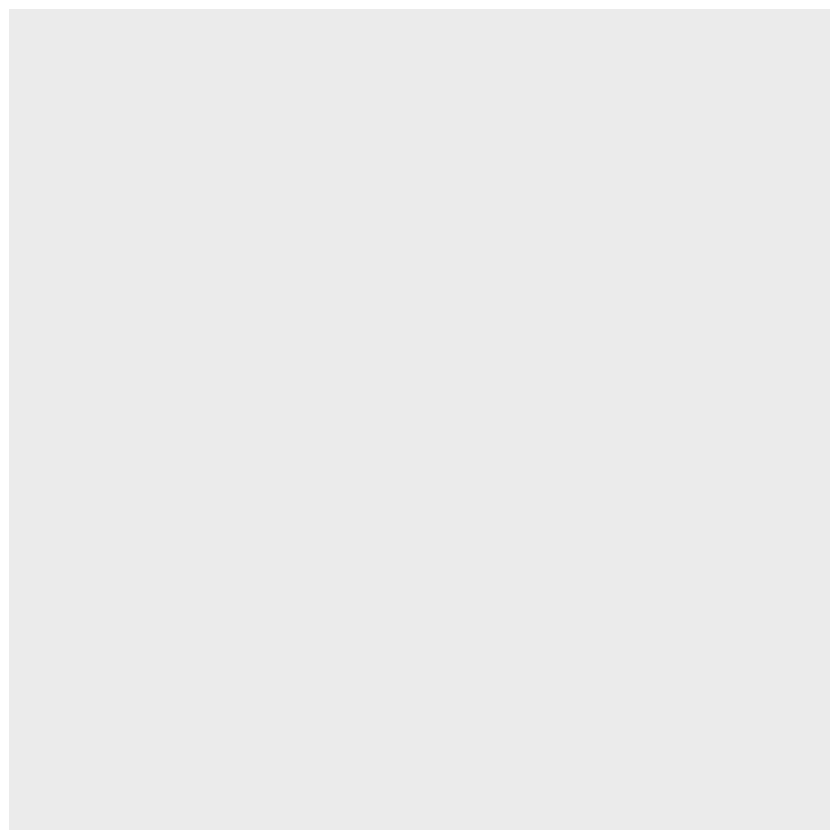

In [89]:
# The data should be in long/tidy format!
ggplot(cars_tbl)

<img src="https://raw.githubusercontent.com/stanmart/mnb_dataviz/master/plots//plot1.png" width="600" align="left"/>

Adding an element:

In [90]:
( # Only the stuff between the outer parntheses is necessary!
    
ggplot(cars_tbl) +
    geom_point(aes(x = Horsepower, y = l_per_100km))

) %>% ggsave(filename = "./plots/plot2.png", plot = ., width = 6, height = 4)

Warning message:
"Removed 14 rows containing missing values (geom_point)."

Warning message:
"Removed 14 rows containing missing values (geom_point)."

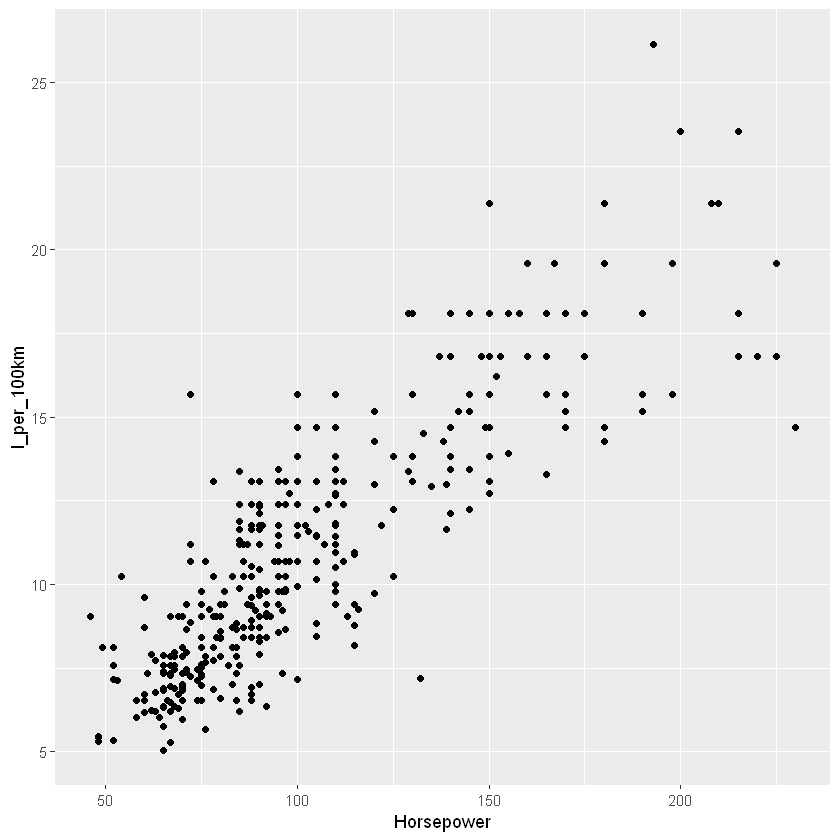

In [91]:
ggplot(cars_tbl) +
    geom_point(aes(x = Horsepower, y = l_per_100km))

<img src="https://raw.githubusercontent.com/stanmart/mnb_dataviz/master/plots//plot2.png" width="600" align="left"/>

Two more aesthetics (data - visual property connection):

In [92]:
(

ggplot(cars_tbl) +
    geom_point(aes(x = Horsepower, y = l_per_100km, color = Origin, shape = factor(Cylinders)))

) %>% ggsave(filename = "./plots/plot3.png", plot = ., width = 6, height = 4)

Warning message:
"Removed 14 rows containing missing values (geom_point)."

Warning message:
"Removed 14 rows containing missing values (geom_point)."

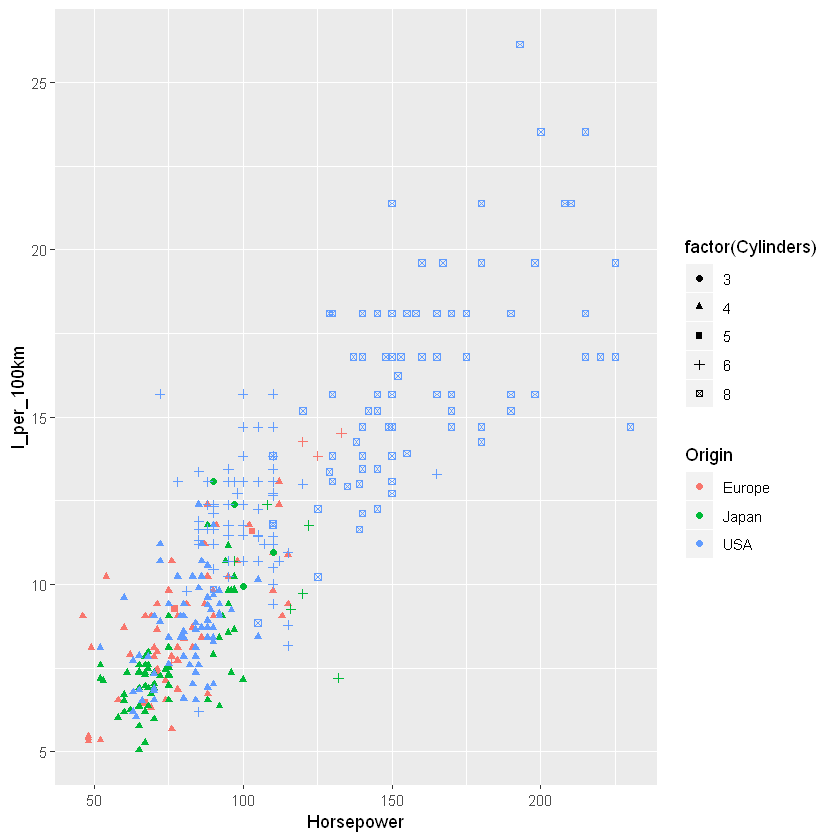

In [93]:
ggplot(cars_tbl) +
    geom_point(aes(x = Horsepower, y = l_per_100km, color = Origin, shape = factor(Cylinders)))

<img src="https://raw.githubusercontent.com/stanmart/mnb_dataviz/master/plots//plot3.png" width="600" align="left"/>

Adding another element:

In [94]:
(

ggplot(cars_tbl) +
    geom_point(aes(x = Horsepower, y = l_per_100km, color = Origin, shape = factor(Cylinders)), alpha = 0.5) +
    stat_smooth(aes(x = Horsepower, y = l_per_100km, color = Origin), method = "lm")

) %>% ggsave(filename = "./plots/plot4.png", plot = ., width = 6, height = 4)

Warning message:
"Removed 14 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 14 rows containing missing values (geom_point)."

Warning message:
"Removed 14 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 14 rows containing missing values (geom_point)."

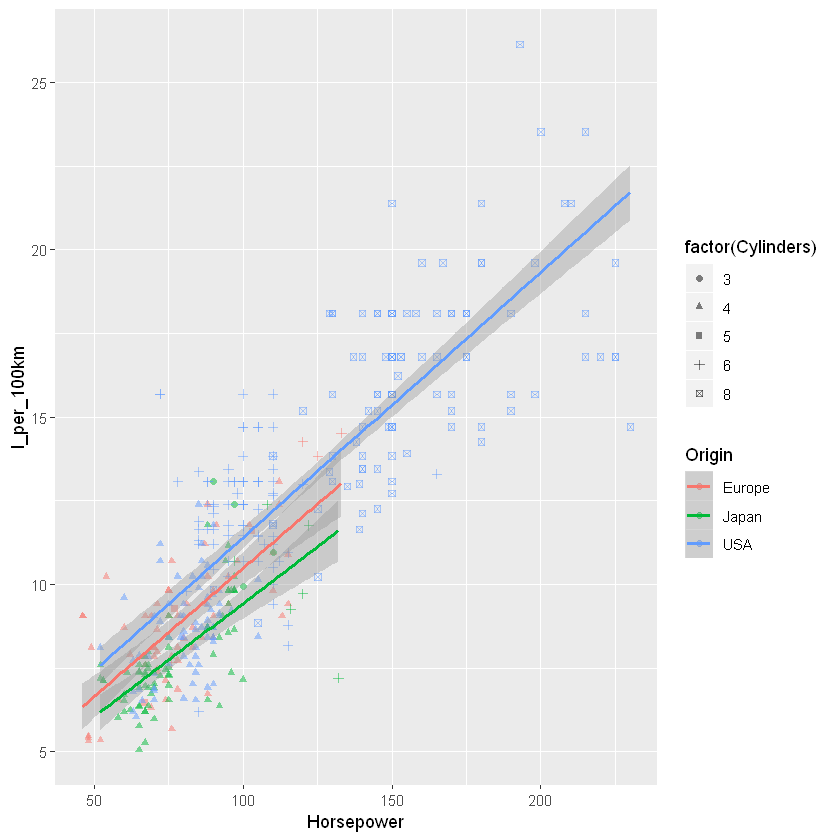

In [95]:
ggplot(cars_tbl) +
    geom_point(aes(x = Horsepower, y = l_per_100km, color = Origin, shape = factor(Cylinders)), alpha = 0.5) +
    stat_smooth(aes(x = Horsepower, y = l_per_100km, color = Origin), method = "lm")

<img src="https://raw.githubusercontent.com/stanmart/mnb_dataviz/master/plots//plot4.png" width="600" align="left"/>

Faceting:

In [96]:
(

ggplot(cars_tbl) +
    geom_point(aes(x = Horsepower, y = l_per_100km, color = Origin, shape = factor(Cylinders)), alpha = 0.5) +
    stat_smooth(aes(x = Horsepower, y = l_per_100km, color = Origin), method = "lm") +
    facet_wrap(~ factor(Year))

) %>% ggsave(filename = "./plots/plot5.png", plot = ., width = 6, height = 4)

Warning message:
"Removed 14 rows containing non-finite values (stat_smooth)."Warning message in qt((1 - level)/2, df):
"NaNs produced"Warning message:
"Removed 14 rows containing missing values (geom_point)."

Warning message:
"Removed 14 rows containing non-finite values (stat_smooth)."Warning message in qt((1 - level)/2, df):
"NaNs produced"Warning message:
"Removed 14 rows containing missing values (geom_point)."

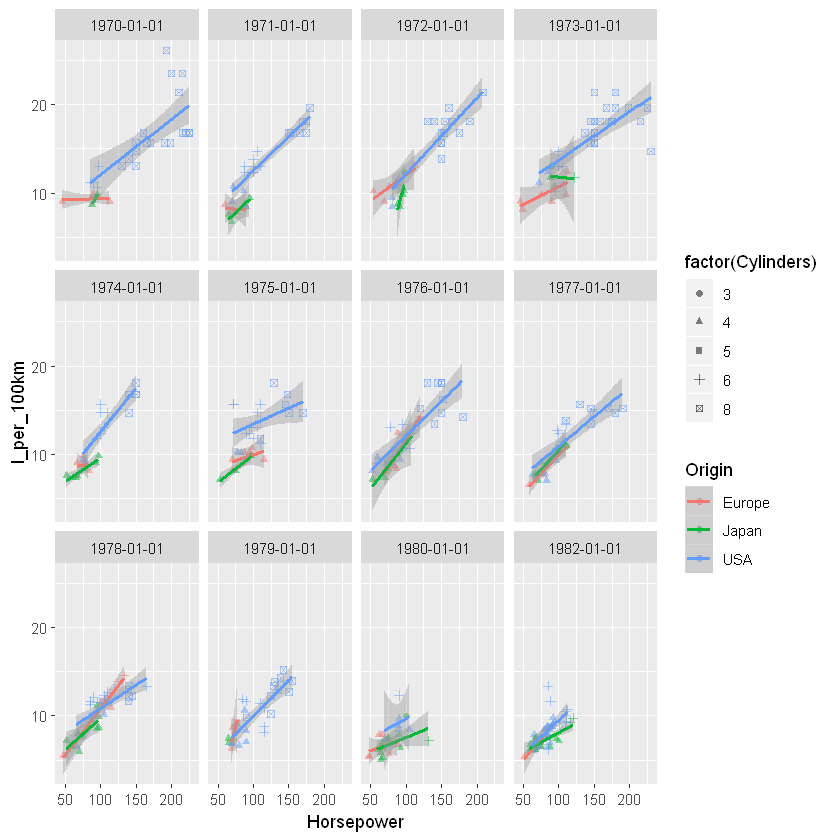

In [97]:
ggplot(cars_tbl) +
    geom_point(aes(x = Horsepower, y = l_per_100km, color = Origin, shape = factor(Cylinders)), alpha = 0.5) +
    stat_smooth(aes(x = Horsepower, y = l_per_100km, color = Origin), method = "lm") +
    facet_wrap(~ factor(Year))

<img src="https://raw.githubusercontent.com/stanmart/mnb_dataviz/master/plots//plot5.png" width="600" align="left"/>

Adding fluff:

In [98]:
(

ggplot(cars_tbl) +
    geom_point(aes(x = Horsepower, y = l_per_100km, color = Origin, shape = factor(Cylinders)),
               alpha = 0.5) +
    stat_smooth(aes(x = Horsepower, y = l_per_100km, color = Origin),
                method = "lm") +
    facet_wrap(~ factor(Year), ncol = 4) +
    ggtitle("Horsepower and consumption by year") +
    xlab("Horsepower") +
    ylab("Consumption (l / 100 km)") +
    theme_bw()

) %>% ggsave(filename = "./plots/plot6.png", plot = ., width = 6, height = 4)

Warning message:
"Removed 14 rows containing non-finite values (stat_smooth)."Warning message in qt((1 - level)/2, df):
"NaNs produced"Warning message:
"Removed 14 rows containing missing values (geom_point)."

Warning message:
"Removed 14 rows containing non-finite values (stat_smooth)."Warning message in qt((1 - level)/2, df):
"NaNs produced"Warning message:
"Removed 14 rows containing missing values (geom_point)."

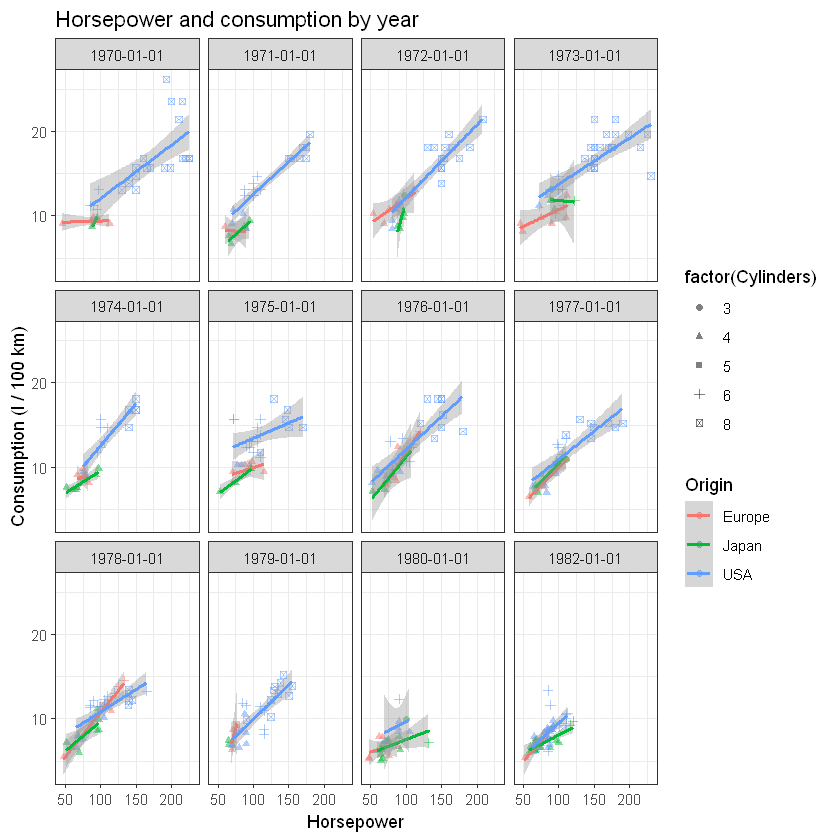

In [99]:
ggplot(cars_tbl) +
    geom_point(aes(x = Horsepower, y = l_per_100km, color = Origin, shape = factor(Cylinders)),
               alpha = 0.5) +
    stat_smooth(aes(x = Horsepower, y = l_per_100km, color = Origin),
                method = "lm") +
    facet_wrap(~ factor(Year), ncol = 4) +
    ggtitle("Horsepower and consumption by year") +
    xlab("Horsepower") +
    ylab("Consumption (l / 100 km)") +
    theme_bw()

<img src="https://raw.githubusercontent.com/stanmart/mnb_dataviz/master/plots//plot6.png" width="600" align="left"/>

Saving the plot:

In [100]:
p <- ggplot(cars_tbl) +
    geom_point(aes(x = Horsepower, y = l_per_100km, color = Origin, shape = factor(Cylinders)),
               alpha = 0.5) +
    stat_smooth(aes(x = Horsepower, y = l_per_100km, color = Origin),
                method = "lm") +
    facet_wrap(~ factor(Year), ncol = 4) +
    ggtitle("Horsepower and consumption by year") +
    xlab("Horsepower") +
    ylab("Consumption (l / 100 km)") +
    theme_bw()

ggsave("cars.png", p)

Saving 6.67 x 6.67 in image
Warning message:
"Removed 14 rows containing non-finite values (stat_smooth)."Warning message in qt((1 - level)/2, df):
"NaNs produced"Warning message:
"Removed 14 rows containing missing values (geom_point)."

And many many more plot objects and faceting options:

In [101]:
ls("package:ggplot2")[grep("^geom_", ls("package:ggplot2"))]

[1] "geom_abline"     "geom_area"       "geom_bar"        "geom_bin2d"     
 [5] "geom_blank"      "geom_boxplot"    "geom_col"        "geom_contour"   
 [9] "geom_count"      "geom_crossbar"   "geom_curve"      "geom_density"   
[13] "geom_density_2d" "geom_density2d"  "geom_dotplot"    "geom_errorbar"  
[17] "geom_errorbarh"  "geom_freqpoly"   "geom_hex"        "geom_histogram" 
[21] "geom_hline"      "geom_jitter"     "geom_label"      "geom_line"      
[25] "geom_linerange"  "geom_map"        "geom_path"       "geom_point"     
[29] "geom_pointrange" "geom_polygon"    "geom_qq"         "geom_qq_line"   
[33] "geom_quantile"   "geom_raster"     "geom_rect"       "geom_ribbon"    
[37] "geom_rug"        "geom_segment"    "geom_sf"         "geom_sf_label"  
[41] "geom_sf_text"    "geom_smooth"     "geom_spoke"      "geom_step"      
[45] "geom_text"       "geom_tile"       "geom_violin"     "geom_vline"

In [102]:
ls("package:ggplot2")[grep("^stat_", ls("package:ggplot2"))]

[1] "stat_bin"            "stat_bin_2d"         "stat_bin_hex"       
 [4] "stat_bin2d"          "stat_binhex"         "stat_boxplot"       
 [7] "stat_contour"        "stat_count"          "stat_density"       
[10] "stat_density_2d"     "stat_density2d"      "stat_ecdf"          
[13] "stat_ellipse"        "stat_function"       "stat_identity"      
[16] "stat_qq"             "stat_qq_line"        "stat_quantile"      
[19] "stat_sf"             "stat_sf_coordinates" "stat_smooth"        
[22] "stat_spoke"          "stat_sum"            "stat_summary"       
[25] "stat_summary_2d"     "stat_summary_bin"    "stat_summary_hex"   
[28] "stat_summary2d"      "stat_unique"         "stat_ydensity"

In [103]:
ls("package:ggplot2")[grep("^facet_", ls("package:ggplot2"))]

[1] "facet_grid" "facet_null" "facet_wrap"

# Regressions

Running a linear regression:

In [104]:
model_1 <- lm(Acceleration ~ Displacement + Horsepower, data = cars_tbl)

In [105]:
class(model_1)

[1] "lm"

It estimates the model but does not calculate the standard errors

In [106]:
model_1


Call:
lm(formula = Acceleration ~ Displacement + Horsepower, data = cars_tbl)

Coefficients:
 (Intercept)  Displacement    Horsepower  
   21.362212      0.009405     -0.073376  


We would usually like those as well

In [107]:
summary(model_1)


Call:
lm(formula = Acceleration ~ Displacement + Horsepower, data = cars_tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9297 -1.2085 -0.2448  1.0821  8.4404 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.362212   0.312520  68.355  < 2e-16 ***
Displacement  0.009405   0.002130   4.415  1.3e-05 ***
Horsepower   -0.073376   0.005785 -12.684  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.968 on 397 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:   0.51,	Adjusted R-squared:  0.5076 
F-statistic: 206.6 on 2 and 397 DF,  p-value: < 2.2e-16


We can use factor variables as well

In [108]:
# Cylinders is a continuous variable:
model_2 <- lm(Acceleration ~ Displacement + Horsepower + Cylinders, data = cars_tbl)
# Cylinder is a factor variable with appropriate dummies
model_3 <- lm(Acceleration ~ Displacement + Horsepower + factor(Cylinders), data = cars_tbl)

## The model object has various attributes

We can get the coefficients

In [109]:
model_1$coefficients

(Intercept) Displacement   Horsepower 
21.362211690  0.009404518 -0.073376147

In [110]:
summary(model_1)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),21.362211690,0.312519848,68.354736,1.112850e-221
Displacement,0.009404518,0.002130209,4.414834,1.304748e-05
Horsepower,-0.073376147,0.005784983,-12.683899,3.475454e-31


In [111]:
coef_mat <- summary(model_1)$coefficients  # it is a matrix
coef_mat["Displacement", "t value"]

[1] 4.414834

Log likelihoods

In [112]:
summary(model_1)$r.squared

[1] 0.5100373

Or F statistics

In [113]:
summary(model_1)$fstatistic

value    numdf    dendf 
206.6329   2.0000 397.0000

We can use factor variables as well

In [114]:
# Cylinders is a continuous variable:
model_2 <- lm(Acceleration ~ Displacement + Horsepower + Cylinders, data = cars_tbl)
# Cylinder is a factor variable with appropriate dummies
model_3 <- lm(Acceleration ~ Displacement + Horsepower + factor(Cylinders), data = cars_tbl)

## Prediction

The `predict` function returns a vector

In [115]:
y_hat <- predict(model_2)
y_hat[1:10]

1        2        3        4        5        6        7        8 
17.44345 14.10835 13.69174 13.10415 17.84130 17.11297 17.49814 16.83711 
       9       10 
14.18743 15.02034

You have to be careful with missing values, though!

In [116]:
length(y_hat)
nrow(cars_tbl)

[1] 400

[1] 406

Predictions can easily be added to a dataframe.

Note the newdata argument. It could be any dataframe with the required coloumns (out of sample predictions). It is required here  so that predict returns a vector with 406 values (padded with `NA`s) instead of 400.

In [117]:
cars_tbl <- mutate(cars_tbl, predicted_acceleration = predict(model_2, newdata = cars_tbl))
head(cars_tbl)

Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year,Weight_in_kg,l_per_100km,predicted_acceleration
20.1,5,183,77,25.4,mercedes benz 300d,Europe,3530,1979-01-01,1601.180,9.260433,17.44345
16.7,6,168,120,16.5,mercedes-benz 280s,Europe,3820,1976-01-01,1732.721,14.255455,14.10835
13.6,6,163,125,17.0,volvo 264gl,Europe,3140,1978-01-01,1424.279,13.836176,13.69174
15.8,6,163,133,16.2,peugeot 604sl,Europe,3410,1978-01-01,1546.749,14.519444,13.10415
21.8,4,146,67,30.0,mercedes-benz 240d,Europe,3250,1980-01-01,1474.174,7.840500,17.84130
19.6,6,145,76,30.7,volvo diesel,Europe,3160,1982-01-01,1433.351,7.661726,17.11297


Similarly to `lm` (linear model), there are a host of other estimation functions. Some of the most useful are
 - `glm`: generalized linear models (probit, logit, Poisson, etc.)
 - `plm`: panel linear model (from the `plm` package)
 - `felm`: fixed effect models with possible instruments (from the `lfe` package)

The nice thing is that `summary`, `predict` and similar functions work on the objects returned by these functions as well. (Technically R does single dispatch on the class of the object) You will also find coefficient vectors, R squared values, log-likelihoods (whenever applicable of course) similarly to linear models.

## Making nice regression tables: `stargazer`

Yes, it is *really* named after the first starship of Captain Picard.

In [118]:
library(stargazer)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [119]:
stargazer(model_1, model_2, model_3, type = "text")


                                               Dependent variable:                           
                    -------------------------------------------------------------------------
                                                  Acceleration                               
                              (1)                      (2)                      (3)          
---------------------------------------------------------------------------------------------
Displacement                0.009***                 0.010***                 0.009**        
                            (0.002)                  (0.004)                  (0.004)        
                                                                                             
Horsepower                 -0.073***                -0.073***                -0.068***       
                            (0.006)                  (0.006)                  (0.006)        
                                                           

Notable skipped things in this session:
 - `NA`/`NaN` handling
 - named lists and vectors
 - working with dates and times
 - matrices
 - object classes
 - statistical tests
 
But once you understand the basic workings of R, you can simply look these up in the documentation.

Further reading:

 - The notes for this tutorial contain the non-tidyverse solutions for the data manipulation tasks
 - For beginners, Hadley Wickham's [R for Data Science](https://r4ds.had.co.nz/) is a wonderful book (available for free online)
 - If you would like to see how deep the rabbit hole goes, Hadley's other book, [Advanced R](https://adv-r.hadley.nz/) is a great next step (also available for free online)

And of course do not hesitate to write us if you have any questions regarding R!

# Thank you!